<font size="5">Extracting FourSquare Data</font>

In [1]:
import numpy as np
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import matplotlib as plt
import matplotlib.colors as colors

In [2]:
# My FourSquare Credentials - Not to be shared!
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' 
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
VERSION = '20180605'

In [51]:
Skegness = [53.1464, 0.3379]
Scarborough = [54.2831, -0.3998]
Southport = [53.6457, -3.0101]
Newquay = [50.4155, -5.0737]
Torquay = [50.4619, -3.5253]
WestonSuperMare = [51.3474, -2.9773]

LIMIT = 1000
radius = 100000

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [53]:
def get_nearby_venues(coords):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, coords[0], coords[1], radius, LIMIT)
    results = requests.get(url).json()
    venues=results['response']['groups'][0]['items']
    nearby_venues = json_normalize(venues)
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    return nearby_venues

In [ ]:
Skegness_venues = get_nearby_venues(Skegness);
Scarborough_venues = get_nearby_venues(Scarborough);
Southport_venues = get_nearby_venues(Southport);
Newquay_venues = get_nearby_venues(Newquay);
Torquay_venues = get_nearby_venues(Torquay);
WestonSuperMare_venues = get_nearby_venues(WestonSuperMare);

In [24]:
Skegness_venues.to_csv('Skegness_venues.csv')
Scarborough_venues.to_csv('Scarborough_venues.csv')
Southport_venues.to_csv('Southport_venues.csv')
Newquay_venues.to_csv('Newquay_venues.csv')
Torquay_venues.to_csv('Torquay_venues.csv')
WestonSuperMare_venues.to_csv('WestonSuperMare_venues.csv')

<font size="5">Establishing Dataset</font>

In [2]:
skegness = pd.read_csv('Skegness_venues.csv')
scarborough = pd.read_csv('Scarborough_venues.csv')
southport = pd.read_csv('Southport_venues.csv')
newquay = pd.read_csv('Newquay_venues.csv')
torquay = pd.read_csv('Torquay_venues.csv')
westonsupermare = pd.read_csv('WestonSuperMare_venues.csv')

In [3]:
# Distinguish between locations before putting into one Data Frame
skegness['Location'] = 'Skegness'
scarborough['Location'] = 'Scarborough'
southport['Location'] = 'Southport'
newquay['Location'] = 'Newquay'
torquay['Location'] = 'Torquay'
westonsupermare['Location'] = 'Weston-super-Mare'

skegness.head()

,Unnamed: 0,name,categories,lat,lng,Location
0,0,Butlin's,Resort,53.178941,0.349867,Skegness
1,1,Natureland Seal Sanctuary,Zoo,53.148747,0.346726,Skegness
2,2,Old Hunstanton Beach,Beach,52.954660,0.500675,Skegness
3,3,Gerardos,Italian Restaurant,53.341681,0.262048,Skegness
4,4,Deepdale Backpackers & Camping,Campground,52.965533,0.684671,Skegness


In [4]:
All_Locations = skegness.append(scarborough).append(southport).append(newquay).append(torquay).append(westonsupermare)

In [5]:
#count venue categories to fing most common type
venue_count = All_Locations.groupby('categories').count()
venue_count.sort_values('name', ascending = False)

,Unnamed: 0,name,lat,lng,Location
categories,,,,,
Pub,72,72,72,72,72
Beach,50,50,50,50,50
Café,46,46,46,46,46
Coffee Shop,33,33,33,33,33
Park,30,30,30,30,30
Bar,25,25,25,25,25
Hotel,23,23,23,23,23
Historic Site,21,21,21,21,21
Restaurant,12,12,12,12,12


<font size="5">Plottong Venues on Maps</font>

Plot the venues of interst on a map of the local area of each location. This is a simple but effective way of seeing whather a particular location has enough attractions/venues in it for it to be an interesting place to visit.

In [6]:
import folium

In [7]:
#Skegness
lat1 = list(skegness["lat"])
lon1 = list(skegness["lng"])
categories = list(skegness["categories"])

skegness_map = folium.Map(location=[53.1464, 0.3379]
                    , zoom_start = 9
                   )

In [20]:
def color_plotter(categories):
    if categories == 'Pub':
        return 'blue'
    elif categories == 'Beach': 
        return 'yellow'
    elif categories == 'Coffee Shop': 
        return 'red'
    elif categories == 'Bar': 
        return 'orange'
    elif categories == 'Restaurant': 
        return 'purple'
    elif categories == 'Historic Site': 
        return 'pink'

    else:
        return 'grey'

In [21]:
points = folium.map.FeatureGroup()
for lt, ln, categories in zip(lat1, lon1, categories):
    points.add_child(folium.CircleMarker([lt,ln], radius=1, color=color_plotter(categories),fill_color=color_plotter(categories)))

skegness_map.add_child(points)

In [22]:
#Scarborough
lat1 = list(scarborough["lat"])
lon1 = list(scarborough["lng"])
categories = list(scarborough["categories"])

scarborough_map = folium.Map(location=[54.2831, -0.3998]
                    , zoom_start = 13
                   )

In [23]:
points = folium.map.FeatureGroup()
for lt, ln, categories in zip(lat1, lon1, categories):
    points.add_child(folium.CircleMarker([lt,ln], radius=5, color=color_plotter(categories),fill_color=color_plotter(categories)))

scarborough_map.add_child(points)

In [24]:
#Southport
lat1 = list(southport["lat"])
lon1 = list(southport["lng"])
categories = list(southport["categories"])

southport_map = folium.Map(location=[53.6457, -3.0101]
                    , zoom_start = 13
                   )

In [25]:
points = folium.map.FeatureGroup()
for lt, ln, categories in zip(lat1, lon1, categories):
    points.add_child(folium.CircleMarker([lt,ln], radius=5, color=color_plotter(categories),fill_color=color_plotter(categories)))

southport_map.add_child(points)

In [26]:
#Newquay
lat1 = list(newquay["lat"])
lon1 = list(newquay["lng"])
categories = list(newquay["categories"])

newquay_map = folium.Map(location=[50.4155, -5.0737]
                    , zoom_start = 13
                   )

In [27]:
points = folium.map.FeatureGroup()
for lt, ln, categories in zip(lat1, lon1, categories):
    points.add_child(folium.CircleMarker([lt,ln], radius=5, color=color_plotter(categories),fill_color=color_plotter(categories)))

newquay_map.add_child(points)

In [28]:
#Torquay
lat1 = list(torquay["lat"])
lon1 = list(torquay["lng"])
categories = list(torquay["categories"])

torquay_map = folium.Map(location=[50.4619, -3.5253]
                    , zoom_start = 13
                   )

In [29]:
points = folium.map.FeatureGroup()
for lt, ln, categories in zip(lat1, lon1, categories):
    points.add_child(folium.CircleMarker([lt,ln], radius=5, color=color_plotter(categories),fill_color=color_plotter(categories)))

torquay_map.add_child(points)

In [30]:
#Weston-super-Mare
lat1 = list(westonsupermare["lat"])
lon1 = list(westonsupermare["lng"])
categories = list(westonsupermare["categories"])

westonsupermare_map = folium.Map(location=[51.3474, -2.9773]
                    , zoom_start = 13
                   )

In [31]:
points = folium.map.FeatureGroup()
for lt, ln, categories in zip(lat1, lon1, categories):
    points.add_child(folium.CircleMarker([lt,ln], radius=5, color=color_plotter(categories),fill_color=color_plotter(categories)))

westonsupermare_map.add_child(points)

From this we can see that some of the locations have very few attractione and ammenities near by e.g. Southport. whereas others had plenty of things to do e.g. Newquay.

It seems that FourSquare does not have a wealth of information on some of these locations, perhaps because they are small resorts located on the coast.

<font size="4">We can do one-hot encoding to see what the 5 most common venues at each location are</font>

In [33]:

# one hot encoding
df_onehot = pd.get_dummies(All_Locations[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Location'] = All_Locations['Location']

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_grouped = df_onehot.groupby('Location').mean().reset_index()
df_grouped

,Location,African Restaurant,American Restaurant,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,...,Theme Park,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Warehouse Store,Waterfront,Wine Bar,Zoo,Zoo Exhibit
0,Newquay,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.06,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Scarborough,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.02,...,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00
2,Skegness,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.04,...,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00
3,Southport,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.05,...,0.00,0.01,0.01,0.02,0.01,0.00,0.01,0.00,0.02,0.01
4,Torquay,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.04,...,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00
5,Weston-super-Mare,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.04,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00


In [34]:
num_top_venues = 5

for hood in df_grouped['Location']:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Newquay----
   venue  freq
0  Beach  0.22
1   Café  0.11
2    Pub  0.09
3  Hotel  0.07
4    Bar  0.06


----Scarborough----
           venue  freq
0            Pub  0.11
1  Historic Site  0.08
2          Beach  0.07
3           Café  0.06
4           Park  0.06


----Skegness----
               venue  freq
0                Pub  0.18
1              Beach  0.08
2               Café  0.07
3               Park  0.07
4  Fish & Chips Shop  0.05


----Southport----
         venue  freq
0  Coffee Shop  0.09
1         Café  0.08
2          Pub  0.07
3         Park  0.05
4          Bar  0.05


----Torquay----
           venue  freq
0            Pub  0.16
1          Beach  0.11
2           Café  0.07
3  Historic Site  0.05
4            Bar  0.04


----Weston-super-Mare----
         venue  freq
0          Pub  0.11
1  Coffee Shop  0.10
2         Park  0.09
3         Café  0.07
4          Bar  0.04




The one hot encoding shows which types of attarction are the most common in a paticular area. Allowing someone to make a judgement about where they would like ti visit based on what sort of attractione they prefer.

<font size="5">K-Means</font>

The k-Means analysis will compare the locatione to each other based on what category of venues are at each location. Useful if you know one of the locatione and want to see if another is similar

In [35]:
from sklearn.cluster import KMeans

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted2['Location'] = df_grouped['Location']

for ind in np.arange(df_grouped.shape[0]):
    neighbourhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted2.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Newquay,Beach,Café,Pub,Hotel,Bar,Seafood Restaurant,Scenic Lookout,Surf Spot,Coffee Shop,Resort
1,Scarborough,Pub,Historic Site,Beach,Café,Park,Coffee Shop,Hotel,Fish & Chips Shop,Brewery,Tea Room
2,Skegness,Pub,Beach,Park,Café,Hotel,Fish & Chips Shop,Bar,Historic Site,Coffee Shop,Movie Theater
3,Southport,Coffee Shop,Café,Pub,Park,Bar,Beer Bar,Cocktail Bar,Church,History Museum,Zoo
4,Torquay,Pub,Beach,Café,Historic Site,Bar,Park,Coffee Shop,Trail,Restaurant,Hotel


In [63]:
# set number of clusters
kclusters = 3

base_grouped_clustering1 = df_grouped.drop('Location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(base_grouped_clustering1)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 1, 0, 1])

In [64]:
# add clustering labels
neighbourhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans.labels_)

In [65]:
All_Locations_merged = All_Locations

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
All_Locations_merged = All_Locations_merged.join(neighbourhoods_venues_sorted2.set_index('Location'), on='Location')

All_Locations_merged.head() # check the last columns!

,Unnamed: 0,name,categories,lat,lng,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Butlin's,Resort,53.178941,0.349867,Skegness,0,Pub,Beach,Park,Café,Hotel,Fish & Chips Shop,Bar,Historic Site,Coffee Shop,Movie Theater
1,1,Natureland Seal Sanctuary,Zoo,53.148747,0.346726,Skegness,0,Pub,Beach,Park,Café,Hotel,Fish & Chips Shop,Bar,Historic Site,Coffee Shop,Movie Theater
2,2,Old Hunstanton Beach,Beach,52.954660,0.500675,Skegness,0,Pub,Beach,Park,Café,Hotel,Fish & Chips Shop,Bar,Historic Site,Coffee Shop,Movie Theater
3,3,Gerardos,Italian Restaurant,53.341681,0.262048,Skegness,0,Pub,Beach,Park,Café,Hotel,Fish & Chips Shop,Bar,Historic Site,Coffee Shop,Movie Theater
4,4,Deepdale Backpackers & Camping,Campground,52.965533,0.684671,Skegness,0,Pub,Beach,Park,Café,Hotel,Fish & Chips Shop,Bar,Historic Site,Coffee Shop,Movie Theater


In [66]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[52.3555, 1.1743], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(All_Locations_merged['lat'], All_Locations_merged['lng'], All_Locations_merged['Location'], All_Locations_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We can see that the locations in the far south west have been grouped together while the other locatione in England have been split into two groups.

<font size="5">Bar Charts</font>

We can use simple bar charts to display how many of a particular typr of venue each location has. From this you can decide where would be a better place to visit based on what you would like to do.

In [48]:
import matplotlib.pyplot as plt

In [52]:
Venue_Selection = ['Pub', 'Beach', 'Coffee Shop', 'Bar', 'Restaurant', 'Historic Site']

Select_Venues = All_Locations.loc[All_Locations['categories'].isin(Venue_Selection)]
Select_Venues.reset_index()
Select_Venues.head()

,Unnamed: 0,name,categories,lat,lng,Location
2,2,Old Hunstanton Beach,Beach,52.954660,0.500675,Skegness
5,5,The White Horse,Pub,52.966052,0.678873,Skegness
6,6,Holkham Beach,Beach,52.967180,0.814254,Skegness
7,7,The Rose And Crown,Pub,52.879715,0.504381,Skegness
10,10,Royal Oak Inn (The Splash),Pub,53.335952,0.038737,Skegness


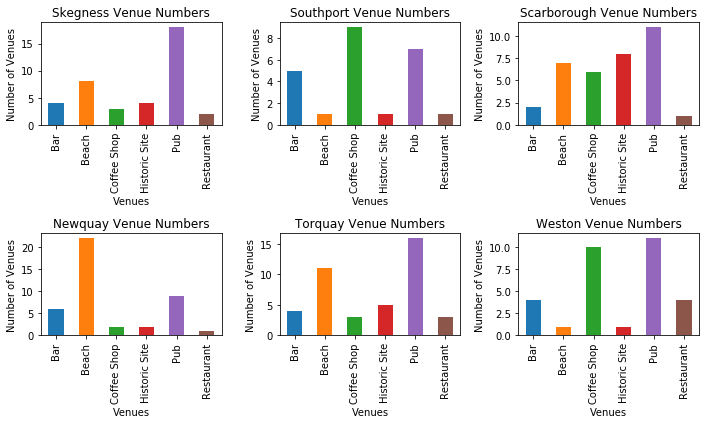

In [53]:
plt.subplot(2,3,1)

Skegness_rows = Select_Venues['Location'] == 'Skegness'
Skegness_venues = Select_Venues[Skegness_rows]
Skegness_venues.groupby('categories')['categories'].count().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Skegness Venue Numbers') # add title to the plot


plt.subplot(2,3,2)

Southport_rows = Select_Venues['Location'] == 'Southport'
Southport_venues = Select_Venues[Southport_rows]
Southport_venues.groupby('categories')['categories'].count().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Southport Venue Numbers') # add title to the plot

plt.subplot(2,3,3)

Scarborough_rows = Select_Venues['Location'] == 'Scarborough'
Scarborough_venues = Select_Venues[Scarborough_rows]
Scarborough_venues.groupby('categories')['categories'].count().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Scarborough Venue Numbers') # add title to the plot

plt.subplot(2,3,4)

Newquay_rows = Select_Venues['Location'] == 'Newquay'
Newquay_venues = Select_Venues[Newquay_rows]
Newquay_venues.groupby('categories')['categories'].count().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Newquay Venue Numbers') # add title to the plot


plt.subplot(2,3,5)

Torquay_rows = Select_Venues['Location'] == 'Torquay'
Torquay_venues = Select_Venues[Torquay_rows]
Torquay_venues.groupby('categories')['categories'].count().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Torquay Venue Numbers') # add title to the plot

plt.subplot(2,3,6)

Weston_rows = Select_Venues['Location'] == 'Weston-super-Mare'
Weston_venues = Select_Venues[Weston_rows]
Weston_venues.groupby('categories')['categories'].count().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Weston Venue Numbers') # add title to the plot

plt.tight_layout()
plt.show()


It can be seen from this that all locations have plenty of pubs but there is quite a large variation in the number of beaches, coffee shops and restaurants.